In [32]:
%reload_ext autoreload
%autoreload 2
import time
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from dops import *

In [7]:
def generate_data(u, theta, C, n, k):
    S = np.zeros((n, len(u)))
    z = np.zeros(n)
    for i in range(n):
        features = np.random.choice(u, size=k, replace=False)
        S[i] = np.array([1 if j in features else 0 for j in u])
        cs = []
        for f in features:
            for j, l in enumerate(C[f]):
                if l == 1 and j not in cs:
                    cs.append(j)
        z[i] = np.sum(theta[cs])
    return S, z

def two_largest(l):
    index1, index2, first, second = 0, 0, None, None
    for i, e in enumerate(l):
        if first == None or e >= first:
            first = e
            index1 = i
        elif second == None or second < e:
            second = e
            index2 = i
    return [index1, index2]

In [44]:
repeat = 20
lins = []
preds = []
truth = []
t1 = time.time()
for _ in range(repeat):
    k = 5
    d = 20
    u = np.arange(d)
    theta = np.random.randint(100, size=d)
    C = np.zeros((d,d))
    for i in range(d):
        features = np.random.choice(u, size=np.random.randint(1,8), replace=False)
        C[i][features] = 1
    S, z = generate_data(u, theta, C, 180, k)
    T, v = generate_data(u, theta, C, 10, k)
    reg = LinearRegression().fit(S, z)
    res_lin = reg.predict(T)
    res, pred_theta, max_item = dops(S, z, T, C, 10, 0.8, np.zeros(d), \
        loss='approx',batch_size=5, eta=1, iters=50, print_every=20, cover_indices=range(d))
    lins.append(res_lin)
    preds.append(res)
    truth.append(v)
t2 = time.time()
print(t2-t1)

Iter 20, theta: [0.93442055 0.92435344 0.92138085 0.91173741 0.86686257 0.90195201
 0.92341441 0.95840791 0.93721354 0.99756456 0.97076298 0.96853881
 0.98935547 0.94875359 0.95086991 0.96592142 0.83089755 0.83011087
 0.90474547 0.95664697], gradient: [ 0.01074799  0.02323122  0.02141664 -0.00956565  0.01814421 -0.01094057
 -0.01486068 -0.06111231  0.00430339  0.006534    0.03411932 -0.0078653
 -0.01051828 -0.00566874 -0.03335395 -0.00851965 -0.0054899   0.01217057
 -0.03988506 -0.0036954 ]
Iter 40, theta: [0.95539872 0.99571511 0.94404183 0.94828713 0.90242843 0.91819759
 0.96321928 0.9295586  0.98754788 1.01873616 0.9589899  0.97587931
 0.95277454 0.89580813 0.931038   0.97528144 0.8644443  0.88595473
 0.9003559  0.96142103], gradient: [ 0.01702428 -0.03281725 -0.02450541 -0.03197584  0.02957536  0.02835892
 -0.05879835  0.01889759 -0.03505747  0.02016023 -0.01183983  0.00111268
 -0.02609208  0.03625362  0.0359341  -0.00617964 -0.00730162 -0.03724148
  0.02270802  0.00146637]
Iter 20

Iter 20, theta: [0.85637555 0.93644218 0.92060446 0.91116581 0.93897324 0.98953175
 0.99246582 0.93274533 0.99174642 0.99764225 0.94523573 0.89764444
 0.86764397 0.82314853 1.00412578 0.96032897 0.9432755  0.92381501
 0.85861795 0.90441369], gradient: [ 0.00159389  0.02161055 -0.01568222 -0.02637521  0.05974331  0.00571627
 -0.02271688 -0.03348033  0.00626994 -0.0297561   0.0029756  -0.01725556
 -0.01225567 -0.05671287 -0.04063522 -0.00158442 -0.02251446 -0.00237958
 -0.00201218  0.01777009]
Iter 40, theta: [0.85903402 0.94584911 0.93999186 0.97768633 0.94087639 0.92254748
 0.96033264 0.96403831 1.04350594 0.98950364 0.99365985 0.8944909
 0.87774091 0.77479757 0.95706189 0.9733317  0.9587953  0.91969244
 0.90156597 0.87734768], gradient: [-0.03524149 -0.02187106  0.03916463 -0.06391175 -0.04394757  0.0014702
  0.04424983  0.00767624  0.01087649  0.03904258 -0.03491837 -0.00971061
  0.0236019   0.01453273  0.04759881 -0.01083374  0.03969882 -0.00341022
 -0.06210851  0.01100359]
Iter 20,

Iter 20, theta: [0.80713407 0.92698383 0.7711649  0.97846883 0.98017145 0.97912274
 0.92318378 0.85406644 0.96788294 0.91614249 0.74734273 0.9892555
 0.98044796 0.88123621 0.88263962 0.9250677  0.84142308 0.86225226
 0.94956219 0.89941286], gradient: [ 1.93430420e-02  1.09126246e-02  2.58269403e-02  1.42600654e-02
 -2.19214229e-02  1.03068448e-03 -3.53945305e-02  3.06594683e-02
 -8.02926555e-03 -1.32152079e-03  1.11213979e-02 -2.68612394e-03
  4.81437136e-03 -8.40957099e-02  1.32789534e-02  1.69241057e-05
  4.80343416e-02 -2.10440779e-02 -6.35945217e-03 -7.68134511e-02]
Iter 40, theta: [0.82677473 0.94361438 0.80258638 0.96677337 0.98136312 0.9938342
 0.94701092 0.94134791 0.97526151 0.93636542 0.76554432 0.96690967
 0.98540299 0.81710012 0.90851143 0.94155467 0.83258857 0.86786096
 0.96367196 0.85593891], gradient: [ 0.02395559 -0.01409641 -0.02792483  0.00716953  0.03045983 -0.00154145
 -0.06741394 -0.10156779  0.00214871 -0.00876579 -0.02885202  0.02089408
 -0.0360302   0.06284646 -

In [45]:
lin = []
pred = []
real = []
rand = []
for i in range(repeat):
    lin.append(truth[i][np.argmax(lins[i])])
    pred.append(truth[i][np.argmax(preds[i])])
    real.append(max(truth[i]))
    rand.append(np.median(truth[i]))

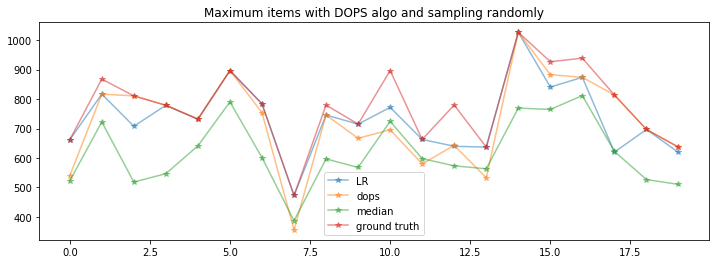

In [46]:
plt.figure(figsize=(12,4))
plt.plot(range(repeat), lin, '*-', alpha=0.5, label='LR')
plt.plot(range(repeat), pred, '*-', alpha=0.5, label='dops')
plt.plot(range(repeat), rand, '*-', alpha=0.5, label='median')
plt.plot(range(repeat), real, '*-', alpha=0.5, label='ground truth')
plt.legend()
plt.title('Maximum items with DOPS algo and sampling randomly')
plt.show()